# Comparez les valeurs LF/HF pour évaluer l’état du système nerveux autonome. comment?

# Analyse Spectrale des Intervalles RR : Calcul des LF et HF

In [3]:
import pandas as pd

# Importer les données
file_path = "C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\Physiologie\\Py_Data_HRV - Data.csv"
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()

,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [5]:
import numpy as np
from scipy.signal import welch

# Étape 1 : Extraire les données Mean RR (ms)
rr_intervals = hrv_data.iloc[0, 1:].values.astype(float)  # Ignorer la première colonne de noms

# Étape 2 : Interpolation pour garantir un échantillonnage constant
# Suppose un intervalle de 1 seconde entre chaque valeur (peut être ajusté selon vos données)
time = np.linspace(0, len(rr_intervals) - 1, len(rr_intervals))
interpolated_rr = np.interp(np.arange(0, len(rr_intervals), 0.25), time, rr_intervals)  # Échantillonnage à 4 Hz

# Étape 3 : Analyse spectrale (utilisation de Welch pour calculer le spectre de puissance)
fs = 4  # Fréquence d'échantillonnage en Hz
frequencies, power = welch(interpolated_rr, fs=fs, nperseg=256)

# Étape 4 : Calcul des puissances dans les bandes LF et HF
lf_band = (frequencies >= 0.04) & (frequencies < 0.15)
hf_band = (frequencies >= 0.15) & (frequencies <= 0.4)

lf_power = np.trapz(power[lf_band], frequencies[lf_band])  # Puissance dans la bande LF
hf_power = np.trapz(power[hf_band], frequencies[hf_band])  # Puissance dans la bande HF

lf_power, hf_power


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 112, using nperseg = 112
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
C:\Users\user\AppData\Local\Temp\ipykernel_2040\365530821.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lf_power = np.trapz(power[lf_band], frequencies[lf_band])  # Puissance dans la bande LF
C:\Users\user\AppData\Local\Temp\ipykernel_2040\365530821.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  hf_power = np.trapz(power[hf_band], frequencies[hf_band])  # Puissance dans la bande HF


(np.float64(687.3729815766043), np.float64(3434.0578153674414))

- LF (Low Frequency) : 687.37 ms²
- HF (High Frequency) : 3434.06 ms²

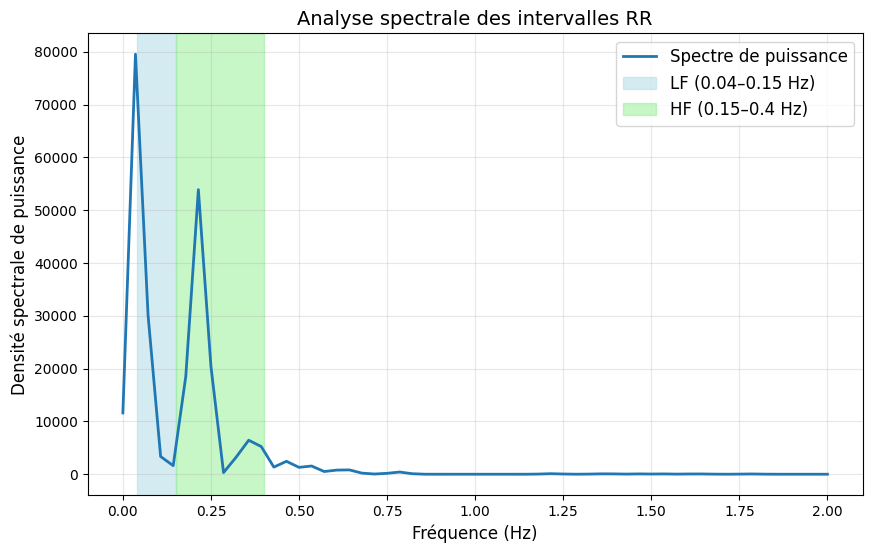

In [6]:
import matplotlib.pyplot as plt

# Graphe du spectre de puissance
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, label='Spectre de puissance', linewidth=2)
plt.axvspan(0.04, 0.15, color='lightblue', alpha=0.5, label='LF (0.04–0.15 Hz)')
plt.axvspan(0.15, 0.4, color='lightgreen', alpha=0.5, label='HF (0.15–0.4 Hz)')

plt.title("Analyse spectrale des intervalles RR", fontsize=14)
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("Densité spectrale de puissance", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Les zones colorées représentent les bandes de fréquences :
- LF (0.04–0.15 Hz) : en bleu clair.
- HF (0.15–0.4 Hz) : en vert clair.

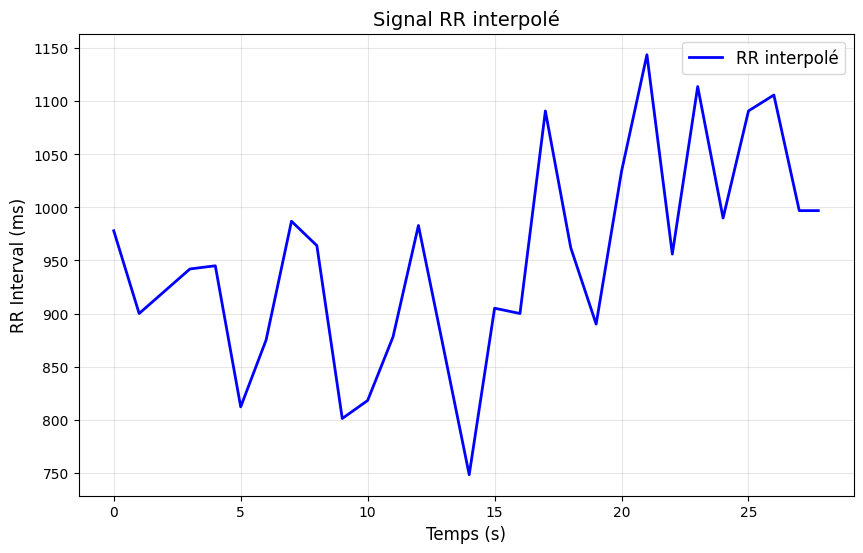

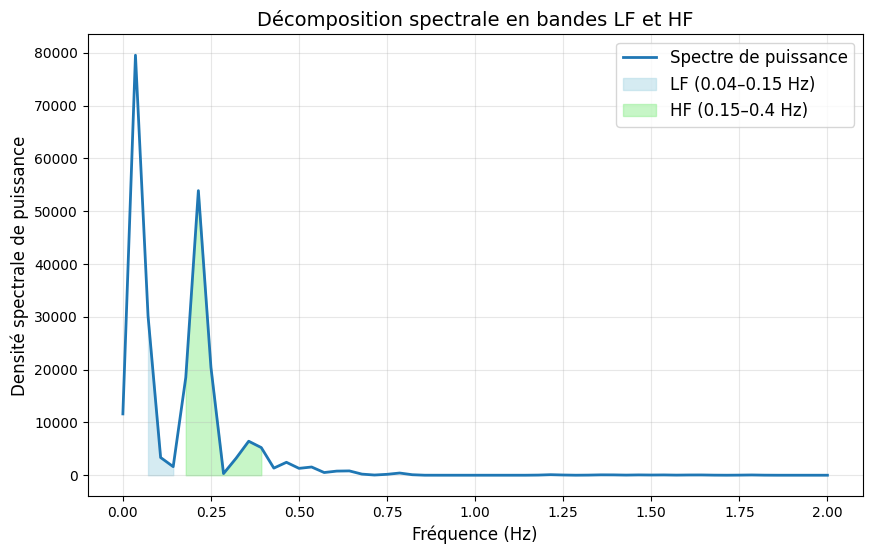

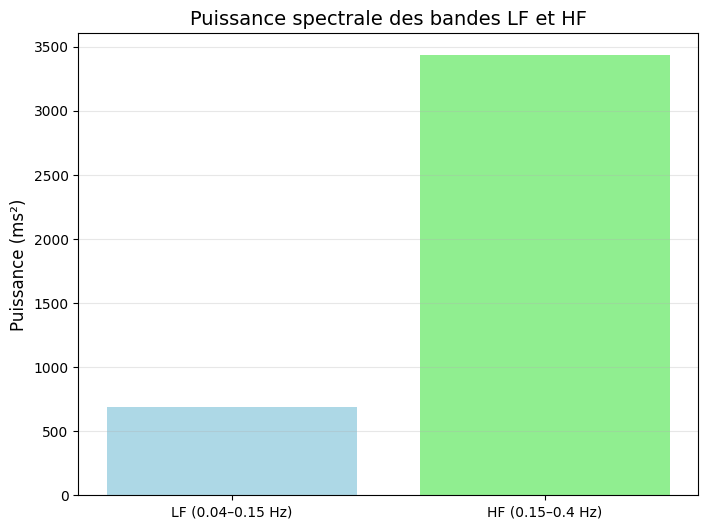

In [7]:
# Graphe 1 : Intervalles RR interpolés
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(interpolated_rr)) / fs, interpolated_rr, label='RR interpolé', color='blue', linewidth=2)
plt.title("Signal RR interpolé", fontsize=14)
plt.xlabel("Temps (s)", fontsize=12)
plt.ylabel("RR Interval (ms)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Graphe 2 : Densité spectrale avec bandes HF et LF séparées
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, label='Spectre de puissance', linewidth=2)
plt.fill_between(frequencies[lf_band], power[lf_band], color='lightblue', alpha=0.5, label='LF (0.04–0.15 Hz)')
plt.fill_between(frequencies[hf_band], power[hf_band], color='lightgreen', alpha=0.5, label='HF (0.15–0.4 Hz)')

plt.title("Décomposition spectrale en bandes LF et HF", fontsize=14)
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("Densité spectrale de puissance", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Graphe 3 : Comparaison de puissances LF et HF
plt.figure(figsize=(8, 6))
plt.bar(['LF (0.04–0.15 Hz)', 'HF (0.15–0.4 Hz)'], [lf_power, hf_power], color=['lightblue', 'lightgreen'])
plt.title("Puissance spectrale des bandes LF et HF", fontsize=14)
plt.ylabel("Puissance (ms²)", fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()
